# Climate Analysis and Exploration Assignment

Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area.

### Load Modules, Define File Path and Create Engine

In [1]:
# Load Modules

%matplotlib inline
# Customizable style sheets and parameters for matplotlib
from matplotlib import style
style.use('fivethirtyeight')
# Plot generator for bar, pie, line, scatter, box and other plots
import matplotlib.pyplot as plt
# High-level math and basic algebra computing tool
import numpy as np
# Dataframe generator that prints out various types of datasets
import pandas as pd
# Date and time attributes such as year, month, day, hour, minute, second 
import datetime as dt

In [2]:
# Load Modules

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
# File Path

# Define variable that represents the file path location
sqlite_file_path = "Resources/hawaii.sqlite"

In [4]:
# Create Engine

# Define variable that holds the create engine function to read sqlite file
sqlite_engine = create_engine(f"sqlite:///{sqlite_file_path}")

### Reflect Tables, Detect Classes and Identify Columns into SQLAlchemy ORM

In [5]:
# Reflect Tables

# Define the automap variable to be used in the table reflect
base = automap_base()
# Reflect the tables from within the .sqlite file
base.prepare(sqlite_engine, reflect=True)

In [6]:
# Detect Classes

# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Define Classes

# Define variable that references each found class name
Measurement = base.classes.measurement
Station = base.classes.station

In [8]:
# Identify Columns

# Define variable for inspect function to get column names from dataset
inspector = inspect(sqlite_engine)
inspector.get_table_names()

# Define variable that returns the columns names and types for the 'Measurement' class
measurement_column_names = inspector.get_columns('Measurement')
for column in measurement_column_names:
    print(column['name'], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Identify Columns

# Define variable that returns the columns names and types for the 'Station' class
station_column_names = inspector.get_columns('Station')
for column in station_column_names:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Identify Format

# Investigate the dataset to see how the data is presented
sqlite_engine.execute('SELECT * FROM Measurement LIMIT 4').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0)]

In [11]:
# Start Session

# Create our session (link) from Python to the DB
session = Session(sqlite_engine)

### Queries: Exploratory Precipitation Analysis

In [12]:
# Specific Query

# Find the most recent date in the data set.
latest_dataset_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_dataset_date_print = dt.date(2017,8,23)
print(f" The most recent date in the Hawaii.sqlite dataset file is {latest_dataset_date_print}.")

 The most recent date in the Hawaii.sqlite dataset file is 2017-08-23.


In [13]:
# Specific Query

# Define variable that finds the date one year ago to the day from the most recent date in the dataset
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f" The date, one year ago, from the most recent date in the Hawaii.sqlite dataset file is {last_year}.")

 The date, one year ago, from the most recent date in the Hawaii.sqlite dataset file is 2016-08-23.


In [14]:
# Specific Query

# Define variable that represents the query of the last 12 months of Percipitation data
last_years_precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).\
    order_by(Measurement.date).all()
# print(last_years_percipitation_data)

In [15]:
# Specific Query

# Define variable that represents a query to retrieve all the data and precipitation scores
total_scores = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()
# print(total_scores)

In [16]:
# Create Dataframe

# Define variable and save the query results as a Pandas DataFrame
precipitation_dataframe = pd.DataFrame(last_years_precipitation_data, columns=["Date","Precipitation"])
# precipitation_dataframe.head()

In [17]:
# Set Index

# Set the dataframes index to the date column
precipitation_dataframe.set_index("Date", inplace=True,)
# precipitation_dataframe.head()

In [18]:
# Sort Dataframe

# Take the previously defined variable and sort the dataframe by date
precipitation_dataframe = precipitation_dataframe.sort_values(by='Date')
precipitation_dataframe.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


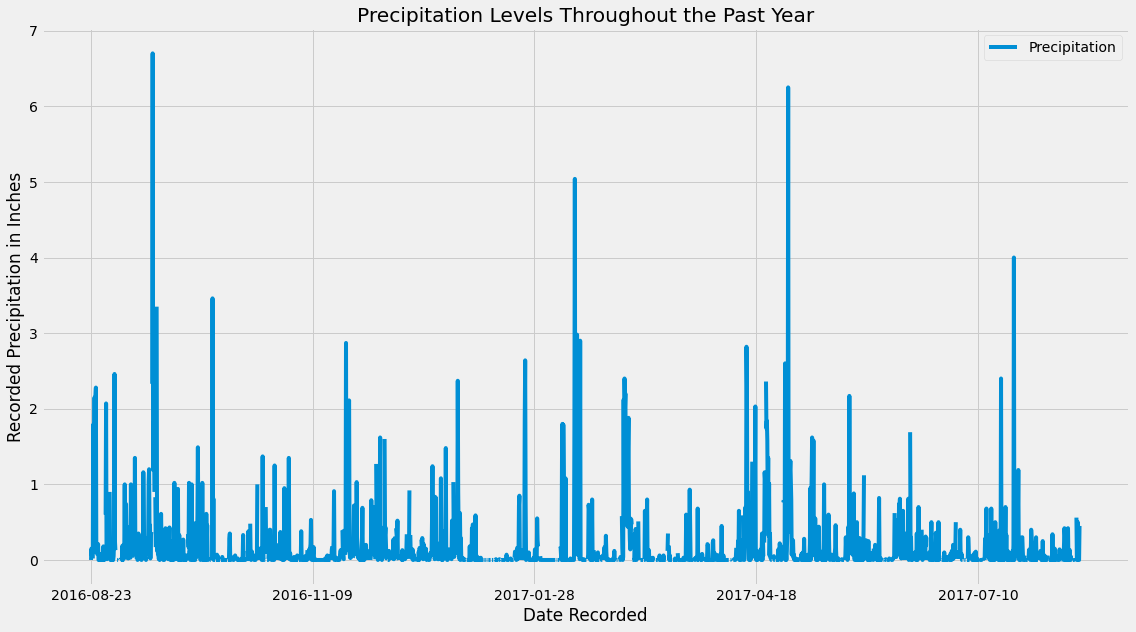

In [19]:
# Create Plot

# Use Pandas Plotting with Matplotlib and create a bar chart plot of the percipitation data
fig, ax = plt.subplots(figsize = (16, 9))
precipitation_dataframe.plot(ax = ax, x_compat = True)

# Create a unique 'Title' for the chart as well as x and y labels
ax.set_xlabel('Date Recorded')
ax.set_ylabel('Recorded Precipitation in Inches')
ax.set_title("Precipitation Levels Throughout the Past Year")

#plt.savefig("Images/precipitation_plot.png")

plt.tight_layout()
plt.show()

## REFERENCED ## "https://github.com/djcim402/Surfs-Up-SQLAlchemy-Homework/blob/master/climate_starter.ipynb"

In [20]:
# Summarize Stats

# With the previously defined Pandas Datafrme, calcualte the summary statistics for the precipitation data
precipitation_dataframe.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Queries: Exploratory Station Analysis

In [21]:
# Specific Query

# Define variable that calculates the total number weather stations in the dataset
total_weather_stations = session.query(Measurement.station).distinct().count()
print(f"There are a total of {total_weather_stations} weather stations in Honolulu, Hawaii.")

There are a total of 9 weather stations in Honolulu, Hawaii.


In [22]:
# Specific Query

# Define variable that queries the total number of measurements per weather station. List the query in descending order.
most_live_weather_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
stations_dataframe = pd.DataFrame(most_live_weather_station, columns=["Station ID","Total Measurements"])
stations_dataframe.set_index("Station ID", inplace=True,)
stations_dataframe

,Total Measurements
Station ID,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [28]:
# Summarize Stats

# Define variable that calculates the minimum, maximum and average temperature from the Measurements class.
temp_stats = [func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)]
# Define varaible that queries the 'temp_stats' variable with the most active weather station
top_weather_station_temperature_statistics = session.query(*temp_stats).\
                        filter(Measurement.station == 'USC00519281').all()
# Create a Pandas DataFrame, and input the query, to make the return results easier to read
top_station_dataframe = pd.DataFrame(top_weather_station_temperature_statistics, columns=["Lowest Temperature","Highest Temperature", "Average Temperature"])
top_station_dataframe

,Lowest Temperature,Highest Temperature,Average Temperature
0,54.0,85.0,71.663781


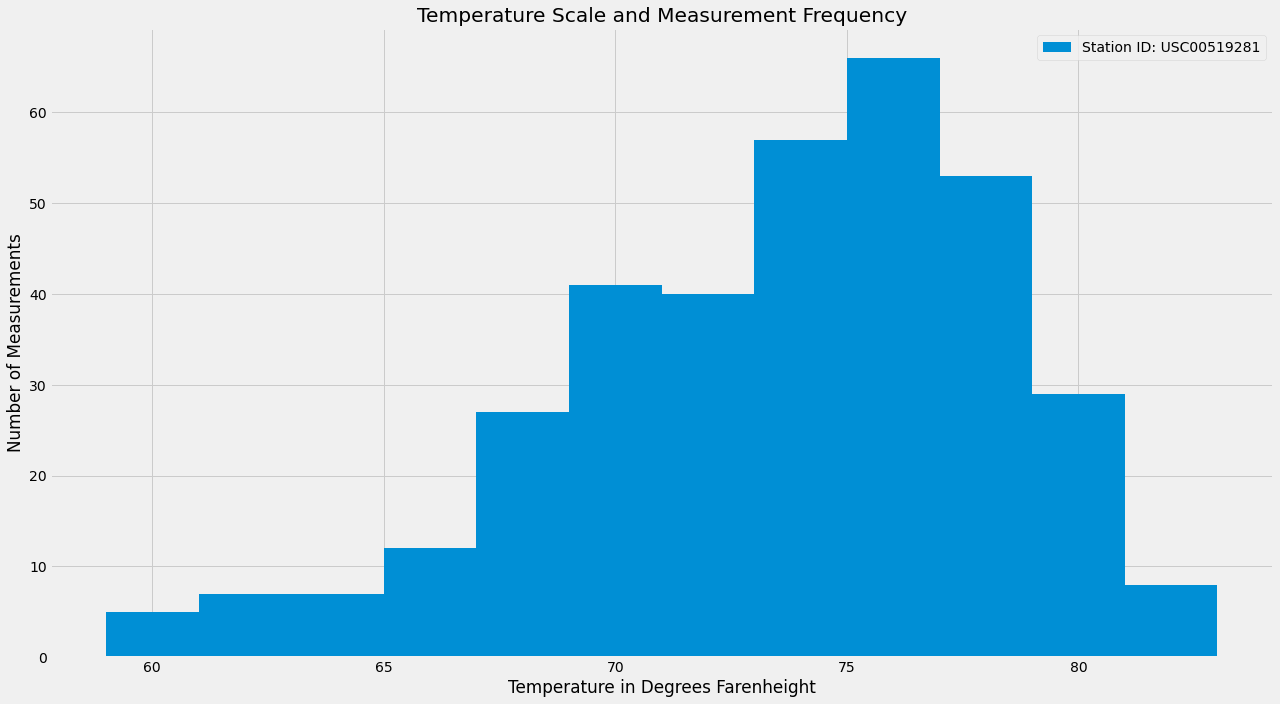

In [45]:
# Create Plot

# With the most live station id, query the last 12 months of temperature observations (tobs) and plot results in a histogram
temperature_observations = session.query(Measurement.tobs).\
                filter(Measurement.date >= last_year).\
                filter(Measurement.station == "USC00519281").\
                order_by(Measurement.date).all()

# Create a Pandas DataFrame so that a Pandas Plot can be executed
temperature_observations_dataframe = pd.DataFrame(temperature_observations, columns=["Station ID: USC00519281"])

# Plot the Results as a Histogram with `bins=12`
temperature_observations_dataframe.plot.hist(bins=12, title="Temperature Scale and Measurement Frequency", figsize=(18,10))
plt.ylabel("Number of Measurements")
plt.xlabel("Temperature in Degrees Farenheight")
plt.legend(loc="upper right")
# plt.savefig("Images/station_plot.png")
plt.tight_layout()
plt.show()

## REFERENCED ## "https://github.com/axyperrary/Assignment-10/blob/master/Climate%20Analysis.ipynb"

### Close session

In [46]:
# Close Session
session.close()